In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(rc={'figure.figsize':(11.7,8.27)})
cmap = sns.diverging_palette(500, 10, as_cmap=True)
from IPython.core.display import display, HTML
from IPython.display import display, Markdown, Latex
pd.options.display.float_format = '{:20,.2f}'.format


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11188\4165804939.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 500

RANDOM_STATE = 734222

### Loading Data

In [5]:
df = pd.read_csv("Mall_Customers.csv")  

In [6]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


### EDA

In [9]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [11]:
from pandas_profiling import ProfileReport

ImportError: cannot import name 'soft_unicode' from 'markupsafe' (C:\Users\LENOVO\anaconda3\lib\site-packages\markupsafe\__init__.py)

In [10]:
ProfileReport(train)

NameError: name 'ProfileReport' is not defined

##### Codificando variaveis categoricas

In [ ]:
import category_encoders as ce

In [ ]:
target_encoder = ce.TargetEncoder(
    cols=cat_var,
    min_samples_leaf=1,
    smoothing=1.0,
    verbose=10
)
target_encoder.fit(X_train, y_train)

##### Imputaçaõ de dados faltantes

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
X_train = target_encoder.transform(X_train)
#X_valid = target_encoder.transform(X_valid)

### Clustering by kmeans

In [7]:
from sklearn.cluster import KMeans

In [8]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

##### Using the elbow method to find the optimal number of clusters

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


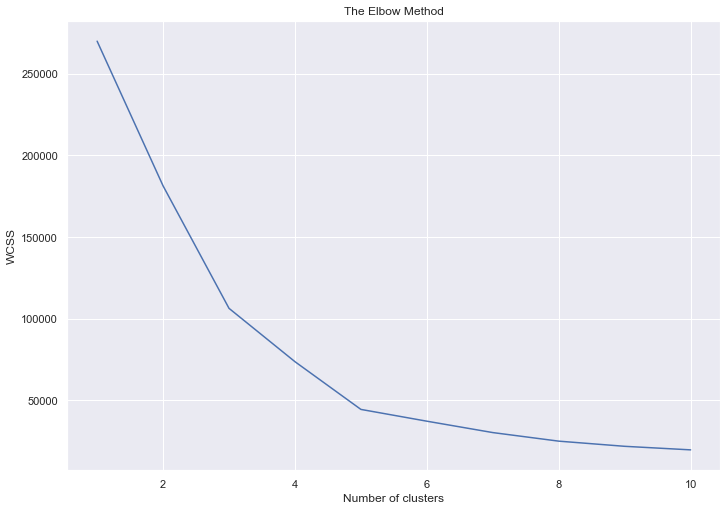

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### Training the K-Means model on the dataset

In [13]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [14]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

##### Visualising the clusters

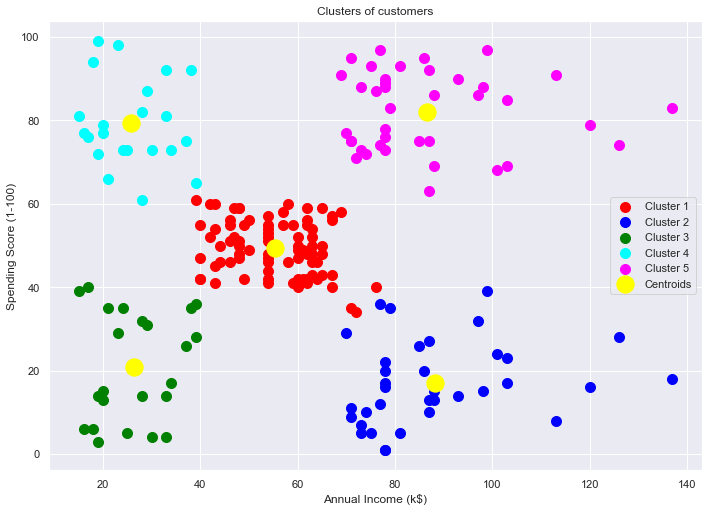

In [15]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Classification

#### Logistic Regression

In [16]:
import timeit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, make_scorer

In [18]:
dataset = pd.read_csv('Social_Network_Ads.xls')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [19]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


##### Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [24]:
X_test.shape

(100, 2)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
stime = timeit.default_timer()

lr = LogisticRegression(
    solver='lbfgs',
    penalty='none',
    C=1.0,
    random_state=RANDOM_STATE
)

lr.fit(X_train, y_train)

etime = timeit.default_timer()

lr_baseline_time = etime - stime
lr_y_train_predict = lr.predict_proba(X_train_optimized)[:, 1]

print(f'Speed: {lr_baseline_time:.2f}s')
print(f'AUC train: {roc_auc_score(y_train, lr_y_train_predict):.2f}')

NameError: name 'X_train_optimized' is not defined

In [ ]:
lr_y_valid_predict = lr.predict_proba(X_valid_optimized)[:, 1]
printb(f'AUC valid: {roc_auc_score(y_valid, lr_y_valid_predict):.2f}')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

##### Visualising the Training set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
stime = timeit.default_timer()

rf_clf = RandomForestClassifier(
    n_estimators=200,
    criterion='gini',
    max_depth=8,
    max_features='sqrt',
    random_state=RANDOM_STATE
)

rf_clf.fit(X_train_optimized, y_train)

etime = timeit.default_timer()

rf_clf_baseline_time = etime - stime
rf_clf_y_train_predict = rf_clf.predict_proba(X_train_optimized)[:, 1]


print(f'Speed: {rf_clf_baseline_time:.2f}s')
print(f'AUC train: {roc_auc_score(y_train, rf_clf_y_train_predict):.2f}')

In [ ]:
rf_clf_y_valid_predict = rf_clf.predict_proba(X_valid_optimized)[:, 1]
print(f'AUC train: {roc_auc_score(y_valid, rf_clf_y_valid_predict):.2f}')

### Regression

#### Linear Regression

In [ ]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

##### Encoding categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

##### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##### Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

##### Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))